In [1]:
from pytorch_fid.fid_score import _willsh_calculate_fid_given_lists, calculate_fid_given_paths
from pathlib import Path

/move/u/willsh/miniconda3/envs/diffusion/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/move/u/willsh/miniconda3/envs/diffusion/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c106detail23torchInternalAssertFailEPKcS2_jS2_RKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
label_root = Path('/move/u/willsh/GitHub/trust-sampling/dataset/ffhq256-100')

device = 'cuda:0'
batch_size = 10
overall_fids = []
batch_fids = []

recons = [
    '/move/u/willsh/GitHub/trust-sampling/demo_image/new_ablation/SuperResolution/ffhq_trust_(440.5,4,1)',
    '/move/u/willsh/GitHub/trust-sampling/demo_image/new_ablation/SuperResolution/ffhq_trust_(441.0,4,1)',
    '/move/u/willsh/GitHub/trust-sampling/demo_image/new_ablation/SuperResolution/ffhq_trust_(441.5,4,1)',
    '/move/u/willsh/GitHub/trust-sampling/demo_image/new_ablation/SuperResolution/ffhq_trust_(442.0,4,1)',
    '/move/u/willsh/GitHub/trust-sampling/demo_image/new_ablation/SuperResolution/ffhq_trust_(999.0,4,1)',
    '/move/u/willsh/GitHub/trust-sampling/demo_image/old plots/experiments/SuperResolution_ablation1/ffhq_trust_(438.0,5,1.0)',
    '/move/u/willsh/GitHub/trust-sampling/demo_image/old plots/experiments/SuperResolution_ablation1/ffhq_trust_(439.0,5,1.0)',
    '/move/u/willsh/GitHub/trust-sampling/demo_image/old plots/experiments/SuperResolution_ablation1/ffhq_trust_(440.0,1,1.0)',
    '/move/u/willsh/GitHub/trust-sampling/demo_image/old plots/experiments/SuperResolution_ablation1/ffhq_trust_(440.0,3,1.0)',
    '/move/u/willsh/GitHub/trust-sampling/demo_image/old plots/experiments/SuperResolution_ablation1/ffhq_trust_(440.0,5,1.0)'
]

for recon in recons:
    recon_root = Path(recon)
    files1 = sorted([file.as_posix() for file in label_root.iterdir() if file.is_file()])
    files2 = sorted([file.as_posix() for file in recon_root.iterdir() if file.is_file()])
    overall_fid = calculate_fid_given_paths([label_root.as_posix(), recon_root.as_posix()], 50, device, dims=2048)


    for j in range(100 // batch_size):
        files1_slice = files1[j*batch_size:(j+1)*batch_size]
        files2_slice = files2[j*batch_size:(j+1)*batch_size]
        batch_fid = _willsh_calculate_fid_given_lists([files1_slice, files2_slice], batch_size, device, dims=2048)
        batch_fids.append(batch_fid)
        overall_fids.append(overall_fid)
        break

100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


In [3]:
import matplotlib.pyplot as plt

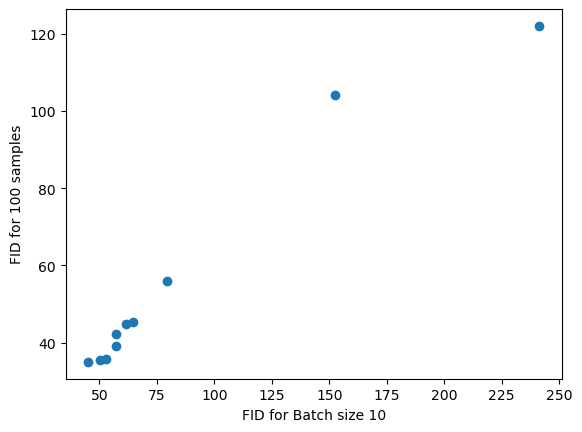

In [5]:

plt.xlabel(f'FID for Batch size {batch_size}')
plt.ylabel(f'FID for 100 samples')
plt.scatter(batch_fids, overall_fids)
# plt.savefig('fidfirst10_fid100.png', dpi=300)
plt.show()